# Data Description

We have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. 

One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make carprice valuation mode

# Import Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Importing Dataset:

In [3]:
#importing dataset from download

df=pd.read_csv('Used_Car_Details.csv')
df.head()

,Name,Year,Engine,Fuel,Transmission,Driven_KM,No_of_Owner,Location,Price
0,Maruti Wagon R LXI CNG,2010,998 CC,CNG,Manual,72000,First,Mumbai,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,1582 CC,Diesel,Manual,41000,First,Pune,12.50
2,Honda Jazz V,2011,1199 CC,Petrol,Manual,46000,First,Chennai,4.50
3,Maruti Ertiga VDI,2012,1248 CC,Diesel,Manual,87000,First,Chennai,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,1968 CC,Diesel,Automatic,40670,Second,Coimbatore,17.74


We pulled the Used Car dataset through web scarping. 

In [4]:
df.dtypes

Name             object
Year              int64
Engine           object
Fuel             object
Transmission     object
Driven_KM         int64
No_of_Owner      object
Location         object
 Price          float64
dtype: object

We have a 9 columns in the dataset which are in object,integer & float type. 

In [5]:
df.shape

(6019, 9)

We have a 6019 rows and 9 columns in the dataset.

# Checking the Null Value:

In [6]:
df.isnull().sum()

Name             0
Year             0
Engine          36
Fuel             0
Transmission     0
Driven_KM        0
No_of_Owner      0
Location         0
 Price           0
dtype: int64

We have a null value in the dataset around 36 rows for the columns. I have decided based on the above info.

Also, there is no use to fill the nan value for this row because all the columns having the null value. If we fill the null value then it will affect the performance of model.

So, I have decided to drop the null value rows in the next step.

In [13]:
df=df.dropna()
df.head()

,Name,Year,Engine,Fuel,Transmission,Driven_KM,No_of_Owner,Location,Price
0,Maruti Wagon R LXI CNG,2010,998 CC,CNG,Manual,72000,First,Mumbai,1.75
1,Hyundai Creta 1.6 CRDi SX Option,2015,1582 CC,Diesel,Manual,41000,First,Pune,12.50
2,Honda Jazz V,2011,1199 CC,Petrol,Manual,46000,First,Chennai,4.50
3,Maruti Ertiga VDI,2012,1248 CC,Diesel,Manual,87000,First,Chennai,6.00
4,Audi A4 New 2.0 TDI Multitronic,2013,1968 CC,Diesel,Automatic,40670,Second,Coimbatore,17.74


In [9]:
df.shape

(5983, 9)

After dropig the unwanted rows then we have a 5983 rows and 9 columns in the dataset.

checking the data type again from the dataset

In [10]:
df.isnull().sum()

Name            0
Year            0
Engine          0
Fuel            0
Transmission    0
Driven_KM       0
No_of_Owner     0
Location        0
 Price          0
dtype: int64

Based on the above info - We don't have a null value in the dataset. However, we can visualization this data through heatmap.

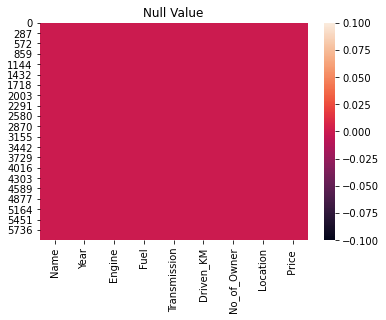

In [11]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

Just I ensure through visualization - We don't gave a null value in the dataset.

# Visualization of Data:

Making the Dataframe for Visualization of data

2014    795
2015    742
2016    741
2013    648
2017    586
2012    573
2011    462
2010    340
2018    298
2009    196
2008    171
2007    123
2019    102
2006     75
2005     56
2004     29
2003     15
2002     14
2001      7
1998      4
2000      4
1999      2
Name: Year, dtype: int64


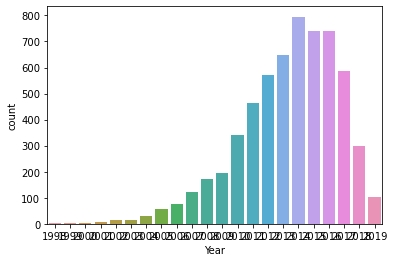

In [12]:
A=sns.countplot(x="Year",data=df)
print(df["Year"].value_counts())

Based on the year wise data - 1999 to 2014 in the dataset.

# Encoding the Dataframe:

In [17]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=OE.fit_transform(df[i].values.reshape(-1,1))
df.head()

,Name,Year,Engine,Fuel,Transmission,Driven_KM,No_of_Owner,Location,Price
0,1185.0,2010,144.0,0.0,1.0,72000,0.0,9.0,1.75
1,506.0,2015,39.0,1.0,1.0,41000,0.0,10.0,12.50
2,480.0,2011,12.0,4.0,1.0,46000,0.0,2.0,4.50
3,1048.0,2012,14.0,1.0,1.0,87000,0.0,2.0,6.00
4,23.0,2013,58.0,1.0,0.0,40670,2.0,3.0,17.74


We have encoded the string value in the dataset

# Describe Dataset

In [18]:
#Statistical Summary
df.describe()

,Name,Year,Engine,Fuel,Transmission,Driven_KM,No_of_Owner,Location,Price
count,5983.00000,5983.000000,5983.000000,5983.000000,5983.000000,5.983000e+03,5983.000000,5983.00000,5983.000000
mean,907.26241,2013.383085,52.041284,2.357179,0.713856,5.868418e+04,0.376901,5.61541,9.496263
std,525.03011,3.249102,42.420923,1.504463,0.451995,9.150334e+04,0.816198,2.95339,11.200462
min,0.00000,1998.000000,0.000000,0.000000,0.000000,1.710000e+02,0.000000,0.00000,0.440000
25%,466.50000,2011.000000,14.000000,1.000000,0.000000,3.396550e+04,0.000000,3.00000,3.500000
50%,913.00000,2014.000000,37.000000,1.000000,1.000000,5.300000e+04,0.000000,5.00000,5.650000
75%,1301.50000,2016.000000,74.000000,4.000000,1.000000,7.300000e+04,0.000000,8.00000,9.950000
max,1859.00000,2019.000000,145.000000,4.000000,1.000000,6.500000e+06,3.000000,10.00000,160.000000


We have a outlier and skewness in the columns in the dataset. So we will check in further step

# Correlation

In [19]:
df.corr()

,Name,Year,Engine,Fuel,Transmission,Driven_KM,No_of_Owner,Location,Price
Name,1.000000,0.010425,0.059521,-0.069752,0.136886,0.027241,-0.026416,0.025713,-0.099839
Year,0.010425,1.000000,-0.061102,-0.125566,-0.096204,-0.172546,-0.384390,-0.020043,0.306137
Engine,0.059521,-0.061102,1.000000,-0.063242,-0.275436,0.028228,0.033371,-0.035636,0.303652
Fuel,-0.069752,-0.125566,-0.063242,1.000000,0.121561,-0.103594,0.043232,0.116212,-0.303846
Transmission,0.136886,-0.096204,-0.275436,0.121561,1.000000,0.025726,0.004647,0.041398,-0.585939
Driven_KM,0.027241,-0.172546,0.028228,-0.103594,0.025726,1.000000,0.079607,-0.043078,-0.011316
No_of_Owner,-0.026416,-0.384390,0.033371,0.043232,0.004647,0.079607,1.000000,-0.034865,-0.094952
Location,0.025713,-0.020043,-0.035636,0.116212,0.041398,-0.043078,-0.034865,1.000000,-0.117031
Price,-0.099839,0.306137,0.303652,-0.303846,-0.585939,-0.011316,-0.094952,-0.117031,1.000000


We got the correlation result from the dataset. But It is difficult to understand the result Hence we are visualization this result through heatmap.

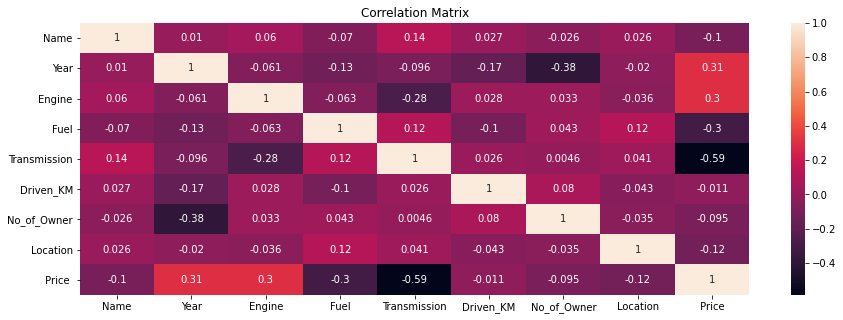

In [20]:
corr_mat=df.corr()
plt.figure(figsize=[15,5])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Hence, I have listed below on ascending order

Positive Sign:

1)Only year & Engine columns have a positive(30%) with target column.

Negative Sign:

1)Transmission, Driven_KM, No_of_owner,Location.

# Outlier Checking 

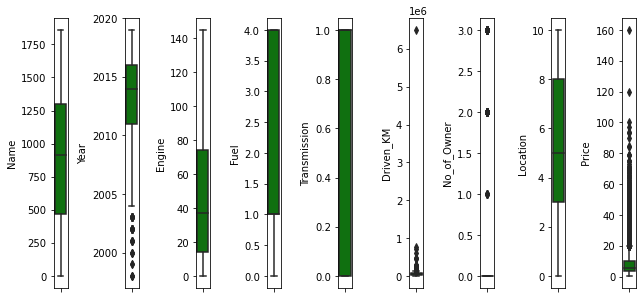

In [21]:
collist=df.columns.values
ncol=12
nrow=6
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Checking Skewness

In [24]:
df.skew()

Name             0.116956
Year            -0.840359
Engine           0.855799
Fuel             0.163436
Transmission    -0.946591
Driven_KM       58.626180
No_of_Owner      1.794449
Location        -0.131965
 Price           3.336198
dtype: float64

From the above info - we can see the skewness in the dataset. So, We will rectify this in upcoming step.

Also, We can consider the -/+.5 is standard

# Data Cleaning

# Removing Outlier

In [25]:
from scipy.stats import zscore
z=np.abs(zscore(df))
print(z.shape)
threshold=3
print(np.where(z>3))

(5983, 9)
(array([  54,   77,  134,  143,  168,  191,  214,  243,  255,  262,  269,
        272,  272,  280,  308,  309,  313,  324,  325,  328,  338,  353,
        354,  356,  362,  366,  371,  373,  390,  402,  416,  457,  471,
        487,  519,  575,  591,  595,  596,  601,  606,  611,  629,  629,
        650,  653,  691,  696,  697,  710,  717,  749,  756,  794,  798,
        826,  862,  907,  907,  909,  914,  937, 1034, 1056, 1074, 1089,
       1109, 1134, 1154, 1190, 1217, 1217, 1220, 1224, 1242, 1278, 1313,
       1330, 1346, 1379, 1390, 1417, 1442, 1488, 1497, 1506, 1529, 1533,
       1552, 1554, 1575, 1621, 1682, 1719, 1733, 1822, 1829, 1835, 1837,
       1838, 1852, 1874, 1877, 1895, 1899, 1899, 1916, 1922, 1966, 1976,
       1991, 2048, 2080, 2086, 2092, 2101, 2152, 2158, 2176, 2199, 2213,
       2239, 2261, 2277, 2280, 2296, 2300, 2308, 2316, 2316, 2369, 2380,
       2403, 2409, 2433, 2474, 2496, 2502, 2511, 2511, 2514, 2523, 2527,
       2532, 2539, 2578, 2606, 2618, 264

In [26]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(5983, 9)
(5688, 9)


We have applied ZSCORE technic for removing outlier in the dataset.

In [28]:
Loss_percentage=(5983-5688)/5983*100
print(Loss_percentage)

4.93063680427879


After removing the outlier - we have only 5% dataloss. So it is good to go with this data.

In [29]:
X=df_new.iloc[:,:-1]
Y=df_new.iloc[:,-1]

I have created the feature and target columns. It will help me to do trian & test for preparing model

# Data Transform for Remove Skewness

In [30]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF=pd.DataFrame(DF,columns=X.columns)

In [31]:
DF.skew()

Name           -0.235145
Year           -0.442318
Engine         -0.054892
Fuel            0.039819
Transmission   -1.036163
Driven_KM       0.053833
No_of_Owner     1.809882
Location       -0.208697
dtype: float64

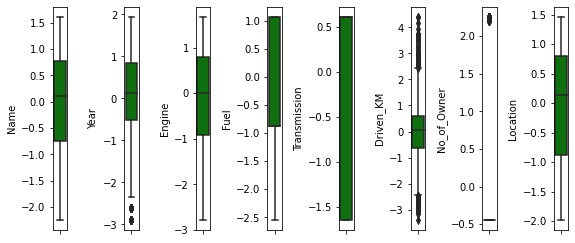

In [33]:
collist=DF.columns.values
ncol=25
nrow=15
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(DF[collist[i]],color='green',orient='v')
    plt.tight_layout()

# Finding the best model and Random State

In [34]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,500):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25,random_state=i)
    LR =LinearRegression()
    LR.fit(x_train,Y_train)
    PX1=LR.predict(x_train)
    PY1=LR.predict(x_test)
    R2 = r2_score(Y_test, PY1)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 59.622245713483935 on Random state 330


In [36]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range (0,500):
    x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25,random_state=i)
    RR =Ridge()
    RR.fit(x_train,Y_train)
    PX2=RR.predict(x_train)
    PY2=RR.predict(x_test)
    R2 = r2_score(Y_test,PY2)
    if R2>maxAccu:
        maxAccu=R2
        maxRS=i
print("Best Accuracy is",maxAccu*100,"on Random state",maxRS)

Best Accuracy is 59.61988994946788 on Random state 330


Best Accuracy score got from the model which are below i have listed:

1) LinearRegression score is - 60%  
3) Ridge score is - 60%  

Based on the above score - Linear have the high score which is 60%. However, we will check with cross validation score then finalize the model.

# Creating the Train_Test_Split

In [38]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25,random_state=330)

# Cross-Validation of the Model

In [44]:
from sklearn.model_selection import cross_val_score
cv1_score=cross_val_score(LR,x,Y,cv=3)
cv2_score=cross_val_score(RR,x,Y,cv=3)
cv1_mean=cv1_score.mean()
cv2_mean=cv2_score.mean()
print(f"Cross Validation Score of is :",cv1_mean*100)
print(f"Cross Validation Score of is :",cv2_mean*100)

Cross Validation Score of is : 55.34746877516159
Cross Validation Score of is : 55.347600079960856


We have a cross validation score which will help us to choose the model.

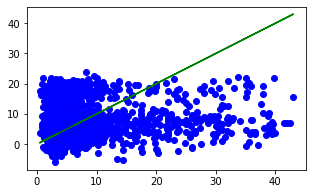

In [45]:
plt.figure(figsize=(5,3))
plt.scatter(x=Y_test,y=PY1,color='b')
plt.plot(Y_test,Y_test,color='g')
plt.show()

# Regularization

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
parameters = {'alpha':[.0001, .001, .01, .1, 1, 10, 100],'random_state':list(range(0,100))}
clf=GridSearchCV(RR,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [47]:
RR=Ridge(alpha=10,random_state=0)
RR.fit(x_train,Y_train)
RR.score(x_train,Y_train)
predict=RR.predict(x_test)
ls=r2_score(Y_test,predict)
print("Lasso Score :",ls*100)

cv_score=cross_val_score(RR,x,Y,cv=3)
cv_mean=cv_score.mean()
print("CV Score :",cv_mean*100)

Lasso Score : 59.59858122982744
CV Score : 55.348561514400515


# Ensemblie Technique

In [48]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
RF=RandomForestRegressor()
clf=GridSearchCV(RF,parameters)
clf.fit(x_train,Y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [49]:
RF=RandomForestRegressor(criterion="mse",max_features="log2")
RF.fit(x_train,Y_train)
RF.score(x_train,Y_train)
pred=RF.predict(x_test)
RFS=r2_score(Y_test,pred)
print("R2 Score :",RFS*100)

rfs=cross_val_score(RF,x,Y,cv=3)
rfc=rfs.mean()
print("CV Score :",rfc*100)

R2 Score : 89.7978283549761
CV Score : 88.11402708240314


# Model Saving

In [50]:
import pickle
filename='Car_Prediction.pkl'
pickle.dump(RF,open(filename,'wb'))

# Conclusion

In [51]:
Loaded_load = pickle.load(open('Car_Prediction.pkl','rb'))
Result=Loaded_load.score(x_test,Y_test)
print(Result)

0.8979782835497611


In [52]:
Conclusion=pd.DataFrame([Loaded_load.predict(x_test)[:],pred[:]],index=["Predicted","Original"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,1412,1413,1414,1415,1416,1417,1418,1419,1420,1421
Predicted,3.5682,2.6033,25.4678,5.29,5.2183,3.217267,8.7822,20.9445,12.911633,5.4431,...,3.2402,6.6691,3.1837,2.2436,3.657,4.6451,19.6943,3.9028,6.8536,5.3468
Original,3.5682,2.6033,25.4678,5.29,5.2183,3.217267,8.7822,20.9445,12.911633,5.4431,...,3.2402,6.6691,3.1837,2.2436,3.657,4.6451,19.6943,3.9028,6.8536,5.3468


Output from the model - The Prediction is seems like very accurate. So the model is performing very well